# **Setting Up and Using the AniList API**

### **Tip 1**: Use a virtual environment to keep your dependencies isolated.  
### **Tip 2**: Don’t worry about tokens expiring—they last a long time.

---

## **Step 1: Register Your Application on AniList**

1. **Go to AniList Developer Settings**:  
   [AniList Developer Settings](https://anilist.co/settings/developer).

2. **Create a New Application**:
   - If you don’t have an AniList account, create one.
   - **Application Name**: Choose a memorable name.
   - **Redirect URL**: Use a dummy URL like `https://example.com/callback`.  
     *(No web development is needed; this is just for OAuth).*

3. **Save the Application**:
   - You’ll receive:
     - **Client ID**
     - **Client Secret**
   - **Important**: Save these securely.
---

## **Step 2: Obtain an Authorization Code**

### **Why Use Authorization Code Grant?**
We’ll hide sensitive keys in a `.env` file and add it to `.gitignore` for security.

### **Construct the Authorization URL**  
Replace placeholders with your actual values:
https://anilist.co/api/v2/oauth/authorize?client_id=YOUR_CLIENT_ID&response_type=code&redirect_uri=YOUR_REDIRECT_URI


### 1.**Open the URL in a Browser**

- Log in to AniList.
- Grant permissions to your app.
- You’ll be redirected to your specified redirect URL, which includes the AUTH_CODE as a query parameter (e.g., https://example.com/callback?code=AUTH_CODE).


#### 2. **Copy the `AUTH_CODE` from the Redirect URL and save it to the `.env` file**



## **Step 3: Exchange Authorization Code for Access Token**

1. **Create a `.env` File**:  
   Store your credentials securely in the following format:

   CLIENT_ID="{INSERT}"

   CLIENT_SECRET="{INSERT}"

   REDIRECT_URI="{INSERT}"
   
   AUTH_CODE="{INSERT}"

2. **Run the First Code Cell**:

This makes a POST request to AniList's `token_url` and retrieves the `ACCESS_TOKEN`


In [9]:
import requests
import os
from dotenv import load_dotenv

# Load variables from .env file
load_dotenv()

# Access the environment variables
CLIENT_ID = os.getenv('CLIENT_ID')
CLIENT_SECRET = os.getenv('CLIENT_SECRET')
REDIRECT_URI = os.getenv('REDIRECT_URI')
ACCESS_TOKEN = os.getenv('ACCESS_TOKEN')
AUTH_CODE = os.getenv('AUTH_CODE')

# Token request payload
token_url = 'https://anilist.co/api/v2/oauth/token' # public endpoint for Anilist 
payload = {
    'grant_type': 'authorization_code',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
    'redirect_uri': REDIRECT_URI,
    'code': AUTH_CODE
}

# Send POST request to exchange code for access token
response = requests.post(token_url, data=payload)
token_data = response.json()

# Print the access token

# uncomment this 
# print("Access Token:", token_data['access_token'])

3. **Add the ACCESS_TOKEN to Your .env File:**
    
    ACCESS_TOKEN="{INSERT}"

4. **Testing json data**

    Now run the cell below to test if you can fetch the anime json data


In [30]:
import requests

# Your access token
ACCESS_TOKEN = os.getenv('ACCESS_TOKEN')

# Authorization headers
headers = {
    'Authorization': f'Bearer {ACCESS_TOKEN}'
}

# GraphQL query to fetch anime details
query = '''
query ($id: Int) {
  Media(id: $id, type: ANIME) {
    id
    title {
      romaji
      english
      native
    }
    format
    episodes
    status
    averageScore
    popularity
    genres
  }
}
'''

# Variables for the query
variables = {
    'id': 1  # Example ID for "Cowboy Bebop"
}

# Make the request
url = 'https://graphql.anilist.co'
response = requests.post(url, json={'query': query, 'variables': variables}, headers=headers)

# Print the response
print(response.json())


{'data': {'Media': {'id': 1, 'title': {'romaji': 'Cowboy Bebop', 'english': 'Cowboy Bebop', 'native': 'カウボーイビバップ'}, 'format': 'TV', 'episodes': 26, 'status': 'FINISHED', 'averageScore': 86, 'popularity': 368961, 'genres': ['Action', 'Adventure', 'Drama', 'Sci-Fi']}}}


1. Load and Visualize the Data


In [31]:
# 1. Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv("data/MAL.csv")

# Preview the data
print(df.head())


   id       title_romaji                   title_english format  episodes  \
0   1   Attack on Titans                 Attack on Titan     TV        25   
1   2   My Hero Academia                My Hero Academia     TV        13   
2   3  Naruto: Shippuden               Naruto: Shippuden     TV       500   
3   4          One Piece                       One Piece     TV      1070   
4   5       Demon Slayer  Demon Slayer: Kimetsu no Yaiba     TV        26   

      status  average_score  mean_score  popularity  favorites  \
0   FINISHED             87          85      250000      12000   
1   FINISHED             80          78      230000      10000   
2   FINISHED             81          79      400000      35000   
3  RELEASING             85          83      500000      50000   
4   FINISHED             89          88      300000      20000   

                            genres  
0           Action, Drama, Fantasy  
1        Action, Superhero, Comedy  
2       Action, Adventure, Fa

2. Preliminary Visualizations


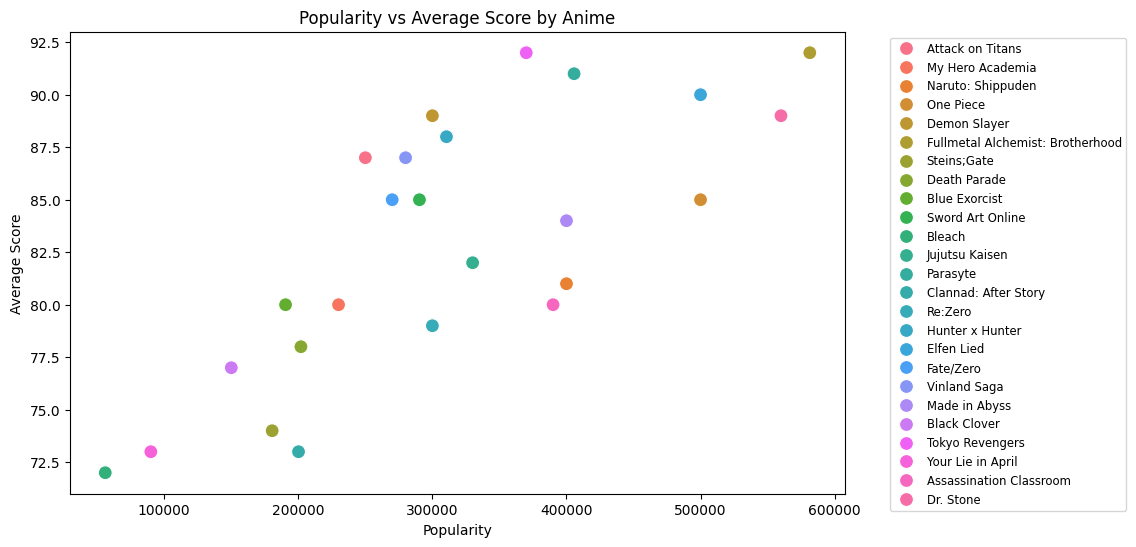

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='popularity', y='average_score', hue='title_romaji', s=100)
plt.title('Popularity vs Average Score by Anime')
plt.xlabel('Popularity')
plt.ylabel('Average Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()


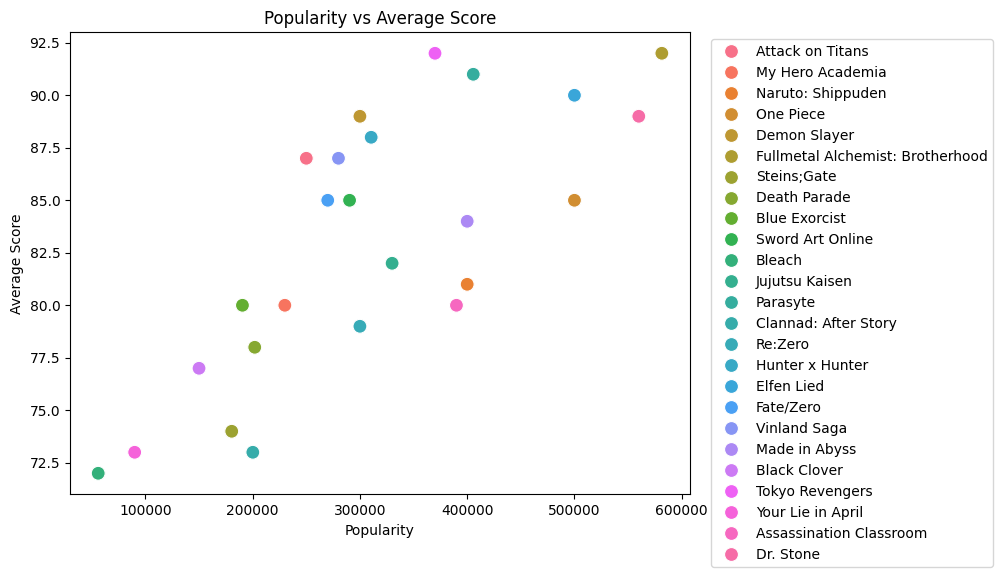

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='popularity', y='average_score', hue='title_romaji', s=100)
plt.title('Popularity vs Average Score')
plt.xlabel('Popularity')
plt.ylabel('Average Score')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()


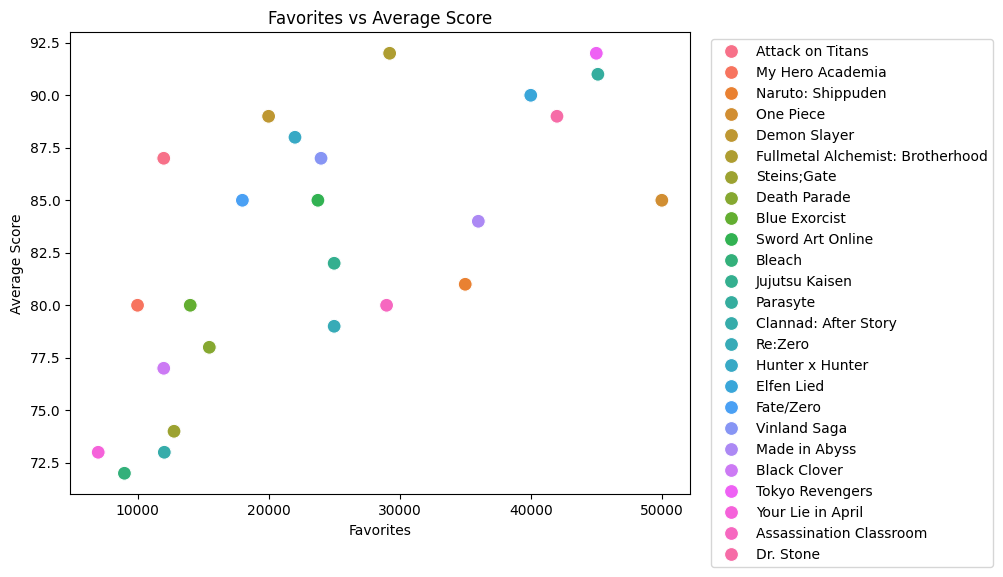

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='favorites', y='average_score', hue='title_romaji', s=100)
plt.title('Favorites vs Average Score')
plt.xlabel('Favorites')
plt.ylabel('Average Score')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()


Plot 3: Genre Distribution

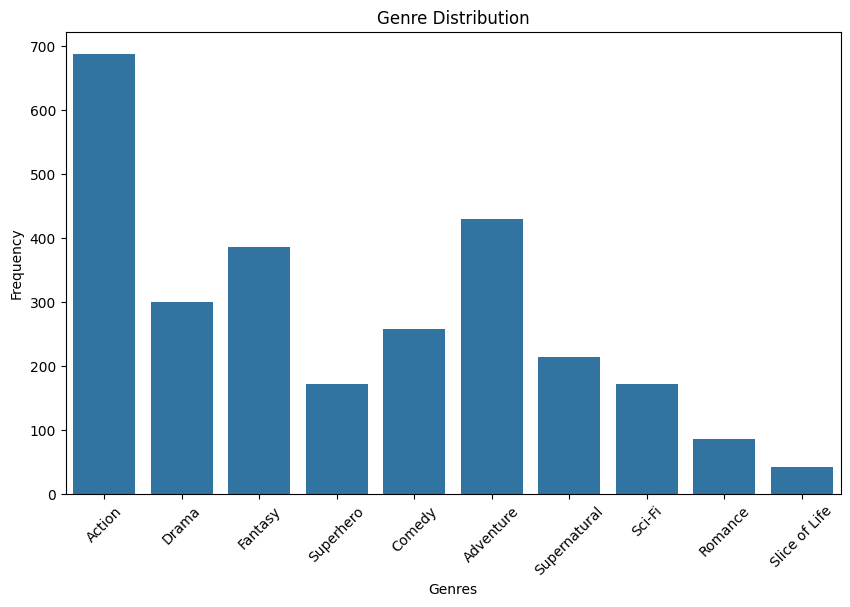

In [24]:
from collections import Counter

# Flatten and count genre occurrences
all_genres = df['genres'].str.split(', ').sum()
genre_counts = Counter(all_genres)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.title('Genre Distribution')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Normalize numerical features
scaler = StandardScaler()
df_scaled = df[['popularity', 'favorites', 'average_score']]
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=['popularity', 'favorites', 'average_score'])

print("Data has been normalized:\n", df_scaled.head())

Data has been normalized:
    popularity  favorites  average_score
0   -0.443078  -0.997442       0.669721
1   -0.592057  -1.156548      -0.479310
2    0.674266   0.832277      -0.315163
3    1.419162   2.025572       0.341426
4   -0.070630  -0.361018       0.998015


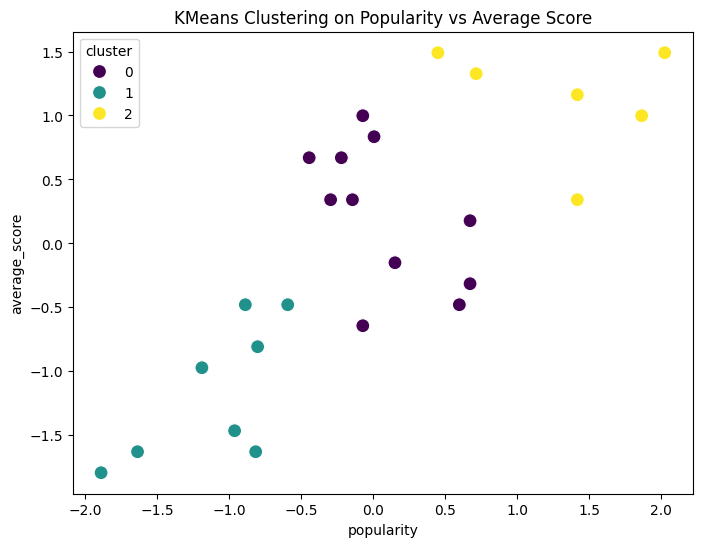

In [28]:
# Apply KMeans clustering to normalized data
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, x='popularity', y='average_score', hue='cluster', palette='viridis', s=100)
plt.title('KMeans Clustering on Popularity vs Average Score')
plt.show()


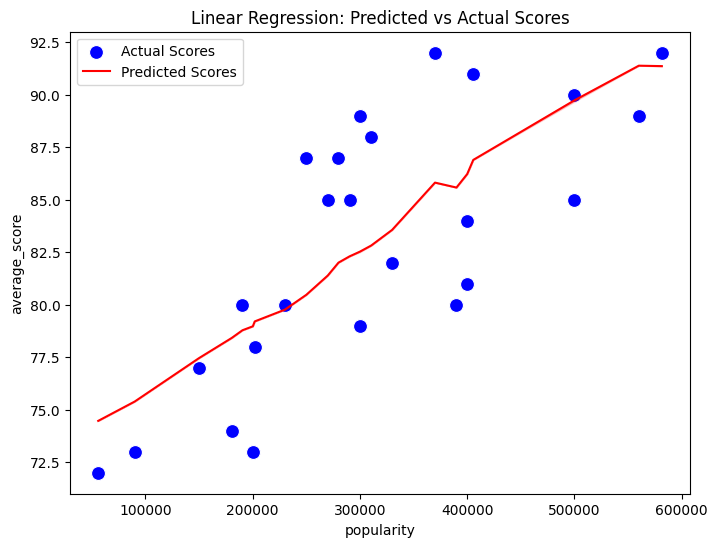

Model Coefficients:  [3.01309544e-05 5.23519871e-05]
Intercept:  72.31040074243963


In [29]:
# Train Linear Regression model
X = df[['popularity', 'favorites']]
y = df['average_score']

model = LinearRegression()
model.fit(X, y)

# Predict and visualize results
df['predicted_score'] = model.predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='popularity', y='average_score', label='Actual Scores', color='blue', s=100)
sns.lineplot(data=df, x='popularity', y='predicted_score', label='Predicted Scores', color='red')
plt.title('Linear Regression: Predicted vs Actual Scores')
plt.legend()
plt.show()

print("Model Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
